<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** 
- Manuel Alejandro Murguia Orantes
- Hector Cesar Ornelas Leon

**Fecha:** 12 de marzo de 2024

**Expediente** : 
- 739360
- 738146 
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/ManuelMurguia/ProyectoConjunto_T5_MAMurguia_HCOrnelas

# Tarea 5: Clase 13

# <font color= red>  Tarea  </font>

Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

Código de solución estudiante 1: Manuel Murguia

## 1. Modelos CNN univariados

### 1.1 Preparación de datos

In [2]:
# Paqueterías necesarias
import numpy as np
import pandas as pd
import warnings
import keras

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Conv1D, MaxPooling1D, concatenate

warnings.filterwarnings('ignore')

In [4]:
target_col = 'price'

df = pd.read_csv("Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
n_steps = 3

# Dividir en muestras
X, y = split_univariate_sequence(df[target_col], n_steps)

In [7]:
X = X.reshape((X.shape[0], X.shape[1], 1))

print(f'Tamaño de X: {X.shape}')
print(f'Tamaño de y: {y.shape}')

Tamaño de X: (542, 3, 1)
Tamaño de y: (542,)


### 1.2 Modelado con CNN

In [8]:
model_1 = Sequential([
    Input(shape=(n_steps,1)),
    Conv1D(64, 2, activation='relu'),
    MaxPooling1D(),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,493 (13.64 KB)

 Trainable params: 3,493 (13.64 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Ajustamos el modelo anterior
history_1 = model_1.fit(X, y, epochs=1000, verbose=False)

<Axes: >

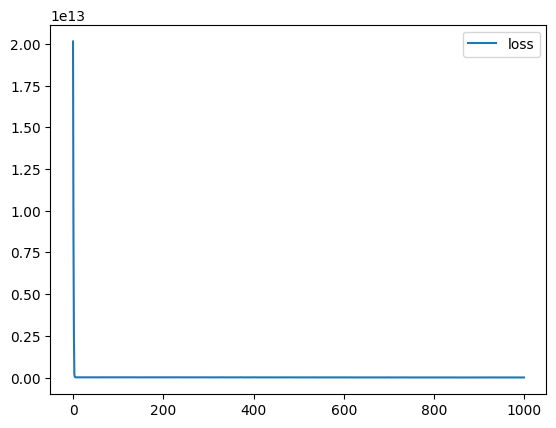

In [10]:
pd.DataFrame(history_1.history).plot()

## 2. Modelos CNN multivariados

### 2.1 Series de entradas múltiples

In [11]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [12]:
numeric_data = df.select_dtypes(include='number')

# Reorder columns
cols = [c for c in numeric_data.columns if c != target_col]
cols += [target_col]
numeric_data = numeric_data[cols]

In [13]:
X, y = split_multivariate_sequence(numeric_data.to_numpy(), n_steps)
n_features = X.shape[2]

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (543, 3, 5)
y: (543,)


#### Modelo CNN

In [14]:
model_2 = Sequential([
    Input(shape=(n_steps, n_features)),
    Conv1D(64, 2, activation='relu'),
    MaxPooling1D(),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model_2.compile(optimizer='adam', loss='mse')
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 2, 64)               │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,005 (15.64 KB)

 Trainable params: 4,005 (15.64 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history_2 = model_2.fit(X, y, epochs=100, verbose=False)

<Axes: >

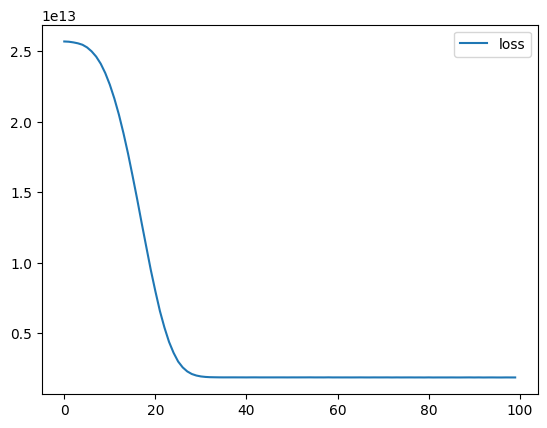

In [16]:
pd.DataFrame(history_2.history).plot()

#### Modelo CNN con múltiples encabezamientos

In [17]:
def create_submodel(steps, features):
    visible = Input((steps, features))
    cnn = Conv1D(64, 2, activation='relu')(visible)
    cnn = MaxPooling1D()(cnn)
    cnn = Flatten()(cnn)
    return visible, cnn

In [18]:
n_features = 1
submodels = [create_submodel(steps=n_steps, features=n_features) for x in range(X.shape[-1])]
inputs = [x[0] for x in submodels]
cnns = [x[1] for x in submodels]

merge = concatenate(cnns)
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

In [19]:
model_3 = Model(inputs=inputs, outputs=output)
model_3.compile(optimizer='adam', loss='mse')
model_3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 3, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_3 (InputLayer)    │ (None, 3, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_4 (InputLayer)    │ (None, 3, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_5 (InputLayer)    │ (None, 3, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_6 (InputLayer)    │ (None, 3, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_2 (Conv1D)             │ (None, 2, 64)             │             192 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_3 (Conv1D)             │ (None, 2, 64)             │             192 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_4 (Conv1D)             │ (None, 2, 64)             │             192 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_5 (Conv1D)             │ (None, 2, 64)             │             192 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_6 (Conv1D)             │ (None, 2, 64)             │             192 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_2               │ (None, 1, 64)             │               0 │ conv1d_2[0][0]             │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_3               │ (None, 1, 64)             │               0 │ conv1d_3[0][0]             │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_4               │ (None, 1, 64)             │               0 │ conv1d_4[0][0]             │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_5               │ (None, 1, 64)             │               0 │ conv1d_5[0][0]             │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_6               │ (None, 1, 64)             │               0 │ conv1d_6[0][0]             │
│ (MaxPooling1D)                │                           │               

 Total params: 17,061 (66.64 KB)

 Trainable params: 17,061 (66.64 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Separar entradas
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)
X3 = X[:, :, 2].reshape(X.shape[0], X.shape[1], n_features)
X4 = X[:, :, 3].reshape(X.shape[0], X.shape[1], n_features)
X5 = X[:, :, 4].reshape(X.shape[0], X.shape[1], n_features)

print(X1.shape)

(543, 3, 1)


In [21]:
history_3 = model_3.fit([X1, X2, X3, X4, X5], y, epochs=100, verbose=0)

<Axes: >

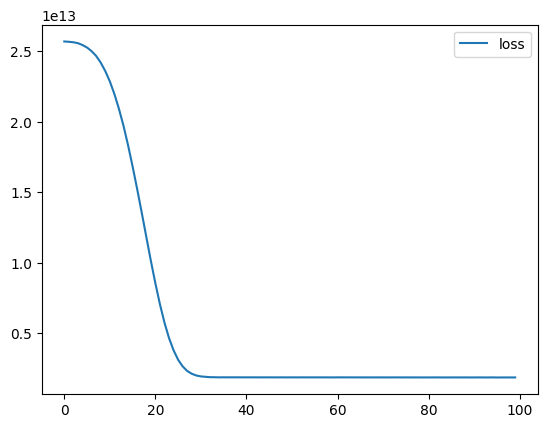

In [22]:
pd.DataFrame(history_3.history).plot()

### 2.2 Múltiples series paralelas

In [23]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [24]:
X, y = split_multiple_forecasting_sequence(numeric_data.to_numpy(), n_steps)

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (542, 3, 6)
y: (542, 6)


In [25]:
n_features = X.shape[2]

model_4 = Sequential([
    Input(shape=(n_steps, n_features)),
    Conv1D(64, 2, activation='relu'),
    MaxPooling1D(),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(n_features)
])

model_4.compile(optimizer='adam', loss='mse')

model_4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)                    │ (None, 2, 64)               │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,388 (17.14 KB)

 Trainable params: 4,388 (17.14 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history_4 = model_4.fit(X, y, epochs=100, verbose=0)

<Axes: >

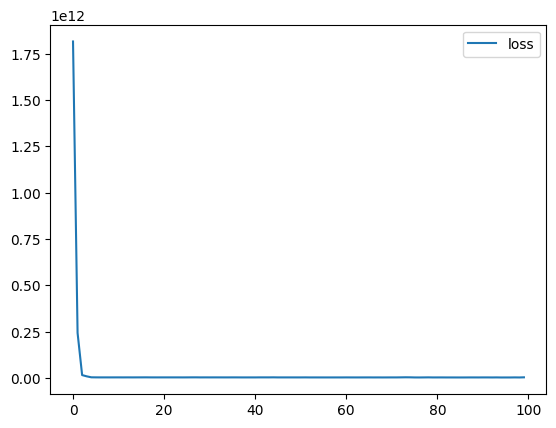

In [27]:
pd.DataFrame(history_4.history).plot()

#### Modelo CNN con múltiples salidas

In [28]:
visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

In [29]:
outputs = [Dense(1, name=f'output_{i+1}')(cnn) for i in range(X.shape[-1])]

model_5 = Model(inputs=visible, outputs=outputs)
model_5.compile(optimizer='adam', loss='mse')

model_5.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 3, 6)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_8 (Conv1D)             │ (None, 2, 64)             │             832 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_8               │ (None, 1, 64)             │               0 │ conv1d_8[0][0]             │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_8 (Flatten)           │ (None, 64)                │               0 │ max_pooling1d_8[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 50)                │           3,250 │ flatten_8[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_1 (Dense)              │ (None, 1)                 │              51 │ dense_8[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_2 (Dense)              │ (None, 1)                 │              51 │ dense_8[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_3 (Dense)              │ (None, 1)                 │              51 │ dense_8[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_4 (Dense)              │ (None, 1)                 │              51 │ dense_8[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_5 (Dense)              │ (None, 1)                 │              51 │ dense_8[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_6 (Dense)              │ (None, 1)                 │              51 │ dense_8[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 4,388 (17.14 KB)

 Trainable params: 4,388 (17.14 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history_5 = model_5.fit(X, y.reshape((-1, 1, 6)), epochs = 150, verbose = 0)

<Axes: >

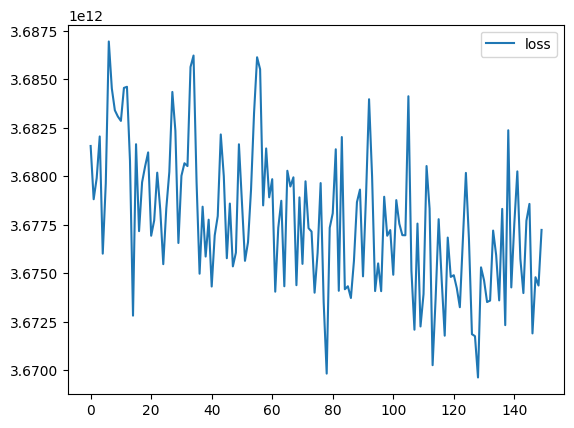

In [34]:
pd.DataFrame(history_5.history).plot()

## 3. Modelos CNN de pasos múltiples

### 3.1 Serie temporal univariada

In [35]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [36]:
n_features = 1
n_steps_in, n_steps_out = 3, 2

X, y = split_univariate_sequence_m_step(df[target_col], n_steps_in, n_steps_out)
X = X.reshape((X.shape[0], X.shape[1], n_features))

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (541, 3, 1)
y: (541, 2)


In [37]:
model_6 = Sequential([
    Input(shape=(n_steps_in, n_features)),
    Conv1D(64, 2, activation='relu'),
    MaxPooling1D(),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(n_steps_out)
])

model_6.compile(optimizer='adam', loss='mse')

model_6.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)                    │ (None, 2, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,544 (13.84 KB)

 Trainable params: 3,544 (13.84 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history_6 = model_6.fit(X, y, epochs=100, verbose=0)

<Axes: >

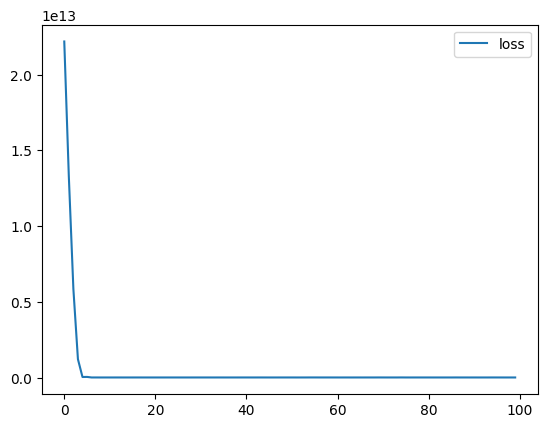

In [39]:
pd.DataFrame(history_6.history).plot()

### 3.2 Serie temporal multivariada

In [40]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [41]:
X, y = split_multivariate_sequence_m_step(numeric_data.to_numpy(), n_steps_in, n_steps_out)

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (542, 3, 5)
y: (542, 2)


In [42]:
n_features = X.shape[2]

# Definir el modelo 
model_7 = Sequential([
    Input(shape=(n_steps_in, n_features)),
    Conv1D(64, 2, activation='relu'),
    MaxPooling1D(),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(n_steps_out)
])

model_7.compile(optimizer='adam', loss='mse')

model_7.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 2, 64)               │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,056 (15.84 KB)

 Trainable params: 4,056 (15.84 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history_7 = model_7.fit(X, y, epochs=100, verbose=0)

<Axes: >

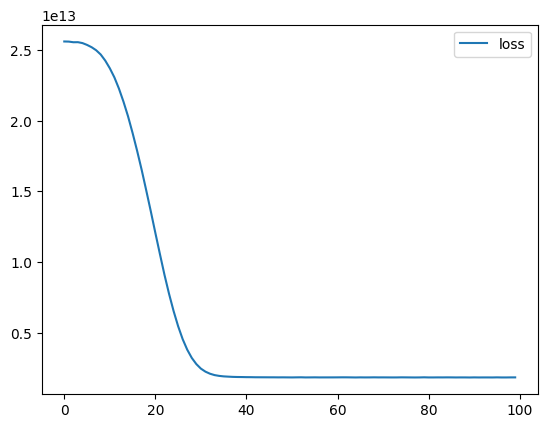

In [51]:
pd.DataFrame(history_7.history).plot()

### 3.3 Serie temporal multivariada predicción múltiple de cada entrada

In [45]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step_parallel(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [46]:
X, y = split_multivariate_sequence_m_step_parallel(numeric_data.to_numpy(), n_steps_in, n_steps_out)

n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (541, 3, 6)
y: (541, 12)


In [47]:
n_features = X.shape[2]

model_8 = Sequential([
    Input(shape=(n_steps_in, n_features)),
    Conv1D(64, 2, activation='relu'),
    MaxPooling1D(),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(n_output)
])

model_8.compile(optimizer='adam', loss='mse')

In [48]:
history_8 = model_8.fit(X, y, epochs=100, verbose=0)

<Axes: >

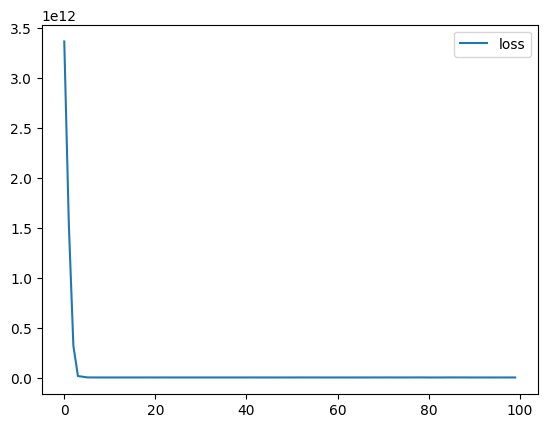

In [50]:
pd.DataFrame(history_8.history).plot()

Código de solución estudiante 2: Hector Ornelas

In [2]:
import numpy as np
import pandas as pd
from keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, concatenate, Input
from keras.utils import plot_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 1. Modelo CNN Univariado

In [4]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [5]:
target = 'price'
n_steps = 3
X, y = split_univariate_sequence(data[target], n_steps)
n_features = 1

In [6]:
model_1 = Sequential()
model_1.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_1.add(MaxPooling1D())
model_1.add(Flatten())
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,493 (13.64 KB)

 Trainable params: 3,493 (13.64 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (542, 3, 1)
y: (542,)


In [8]:
history_1 = model_1.fit(X,y, epochs = 80, verbose = False)

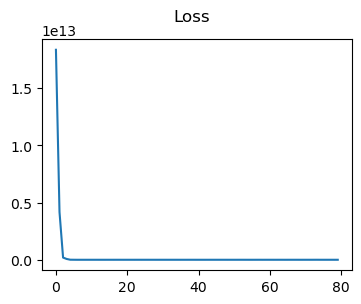

In [9]:
plt.figure(figsize=(4,3))

plt.plot(history_1.history['loss'])
plt.suptitle('Loss')

plt.show()

In [10]:
# Prueba del modelo
x_input = np.array(data['price'][-3:])  
x_input = np.reshape(x_input, (1, x_input.shape[0], 1))  
yhat = model_1.predict(x_input, verbose=0)
yhat

array([[1722294.1]], dtype=float32)

## 2. Modelos CNN multivariados

### 2.1 Series de entradas múltiples

In [11]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [12]:
categorical = data.select_dtypes(exclude='int') 
dummy = pd.get_dummies(data[categorical.columns], drop_first=True) 
dummy = dummy.astype('int')  
data_without_cat = data.drop(columns=categorical.columns)
data_encoded = pd.concat([data_without_cat, dummy], axis=1)
price_col = data_encoded.pop('price')
data_encoded['price'] = price_col

In [13]:
n_steps = 3
X, y = split_multivariate_sequence(data_encoded.to_numpy(), n_steps)
n_features = X.shape[2]
X.shape, y.shape

((543, 3, 13), (543,))

In [14]:
model_2 = Sequential()
model_2.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_2.add(MaxPooling1D())
model_2.add(Flatten())
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 2, 64)          │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,029 (19.64 KB)

 Trainable params: 5,029 (19.64 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history_2 = model_2.fit(X,y, epochs = 80, verbose = False)

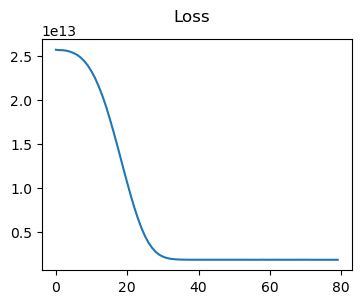

In [16]:
plt.figure(figsize=(4,3))
plt.plot(history_2.history['loss'])
plt.suptitle('Loss')
plt.show()

In [17]:
last_3 = X[-3:][0]
input_array = last_3
input_array_reshaped = input_array.reshape((1, n_steps, n_features))
predicted_y = model_2.predict(input_array_reshaped, verbose=0)
predicted_y

array([[2499441.5]], dtype=float32)

### Modelo con múltiples encabezamientos

In [18]:
n_features = 1
n_steps = 3

In [19]:
# Primer modelo de entrada
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

In [20]:
# Segundo modelo de entrada
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

In [21]:
# Merge modelos de entrada
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

In [22]:
# Conectar entradas y salida del modelo
model_3 = Model(inputs=[visible1, visible2], outputs=output)
model_3.compile(optimizer='adam', loss='mse')
model_3.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 3, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 3, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 2, 64)     │        192 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 2, 64)     │        192 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 1, 64)     │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 1, 64)     │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 64)        │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 64)        │          0 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 50)        │      6,450 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         51 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,885 (26.89 KB)

 Trainable params: 6,885 (26.89 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
X[0].shape

(3, 13)

In [24]:
n_features = 1

# Separar datos de entrada
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)

In [25]:
X1.shape

(543, 3, 1)

In [26]:
history_3 = model_3.fit([X1, X2], y, epochs=80, verbose=0)

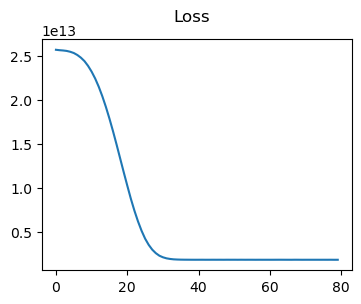

In [27]:
plt.figure(figsize=(4,3))

plt.plot(history_3.history['loss'])
plt.suptitle('Loss')

plt.show()

In [28]:
x1 = X1[-3:][0].reshape((1, n_steps, n_features))
x2 = X2[-3:][0].reshape((1, n_steps, n_features))
yhat = model_3.predict([x1, x2], verbose=0)
yhat

array([[2506657.]], dtype=float32)

### 2.2 Múltiples series paralelas (multivariable forecasting)

In [29]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [30]:
n_steps = 3
X_m, y_m = split_multiple_forecasting_sequence(data_encoded.to_numpy(), n_steps=3)

In [31]:
n_features  = X_m.shape[2]
model_4 = Sequential()
model_4.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_4.add(MaxPooling1D())
model_4.add(Flatten())
model_4.add(Dense(55, activation='relu'))
model_4.add(Dense(n_features))
model_4.compile(optimizer='adam', loss='mse')

In [32]:
history_4 = model_4.fit(X_m, y_m, epochs=80, verbose=0)

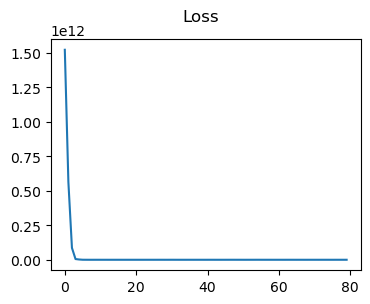

In [33]:
plt.figure(figsize=(4,3))
plt.plot(history_4.history['loss'])
plt.suptitle('Loss')
plt.show()

In [34]:
x_input  = X_m[-1].reshape((1, n_steps, n_features))
yhat = model_4.predict(x_input, verbose=0)
print(yhat)

[[ 9.9893445e+02 -1.2640903e+03 -4.1049344e+02  1.4400300e+03
   5.2702094e+02  1.8595105e+02  2.2513784e+03 -3.5330395e+01
  -3.8281021e+02  2.4733411e+03  3.4987015e+02  6.1950079e+02
  -5.3313855e+02  1.7274216e+06]]


### Modelo CNN con multiples salidas

In [35]:
n_features = X_m.shape[2]

visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

In [36]:
# Definimos salida 1
output1 = Dense(1)(cnn)
# Definimos salida 2
output2 = Dense(1)(cnn)
# Definimos salida 3
output3 = Dense(1)(cnn)

In [37]:
model_5 = Model(inputs=visible, outputs=[output1, output2, output3])
model_5.compile(optimizer='adam', loss='mse')

In [38]:
model_5.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 3, 14)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 2, 64)     │      1,856 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_5     │ (None, 1, 64)     │          0 │ conv1d_5[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 64)        │          0 │ max_pooling1d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 50)        │      3,250 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         51 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │         51 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         51 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,259 (20.54 KB)

 Trainable params: 5,259 (20.54 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Separar salidas
y1 = y_m[:, 0].reshape((y_m.shape[0], 1))
y2 = y_m[:, 1].reshape((y_m.shape[0], 1))
y3 = y_m[:, 2].reshape((y_m.shape[0], 1))

In [40]:
print(y_m.shape)
print(y1.shape)

(542, 14)
(542, 1)


In [41]:
history_5 = model_5.fit(X_m, [y1,y2,y3], epochs=80, verbose=0)

<Axes: >

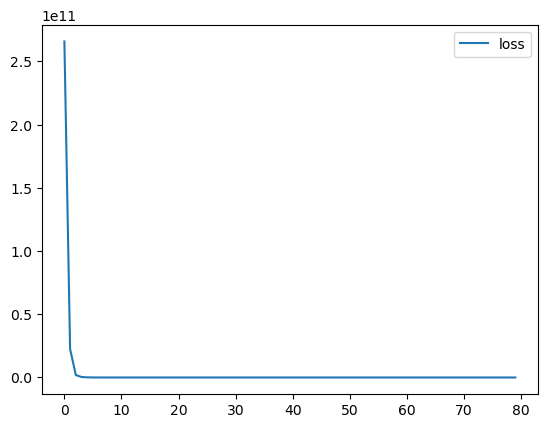

In [42]:
pd.DataFrame(history_5.history).plot()

## 3. Modelos CNN de pasos múltiples

### 3.1 Serie temporal univariada

In [43]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [44]:
n_steps_in, n_steps_out  = 3, 2
X, y = split_univariate_sequence_m_step(data['price'], n_steps_in, n_steps_out)
X.shape, y.shape

((541, 3), (541, 2))

In [45]:
# Debemos tranformar nuestro datos de [samples, timesteps] a [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(541, 3, 1)

In [46]:
# Crear nuestro modelo
model_6 = Sequential()
model_6.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_6.add(MaxPooling1D())
model_6.add(Flatten())
model_6.add(Dense(50, activation='relu'))
model_6.add(Dense(n_steps_out))
model_6.compile(optimizer='adam', loss='mse')

model_6.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 2, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,544 (13.84 KB)

 Trainable params: 3,544 (13.84 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history_6 = model_6.fit(X, y, epochs=80, verbose=0)

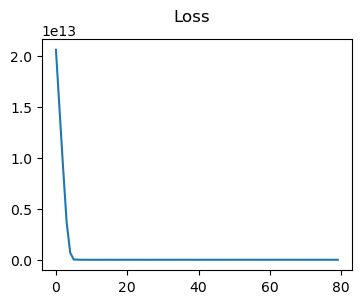

In [48]:
plt.figure(figsize=(4,3))
plt.plot(history_6.history['loss'])
plt.suptitle('Loss')
plt.show()

In [49]:
last_sample = X[-1]
x_input  = last_sample.reshape((1, n_steps, n_features))
yhat = model_6.predict(x_input, verbose=0)
print(yhat)

[[1779125.9 1767990.2]]


### 3.2 Serie temporal multivariada

In [50]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1

        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [51]:
# Elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 3, 2

X, y = split_multivariate_sequence_m_step(data_encoded.to_numpy(), n_steps_in, n_steps_out)

In [52]:
n_features = X.shape[2]

# Definir el modelo 
model_7 = Sequential()
model_7.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_7.add(MaxPooling1D())
model_7.add(Flatten())
model_7.add(Dense(50, activation='relu'))
model_7.add(Dense(n_steps_out))
model_7.compile(optimizer='adam', loss='mse')
model_7.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 2, 64)          │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,080 (19.84 KB)

 Trainable params: 5,080 (19.84 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history_7 = model_7.fit(X, y, epochs=80, verbose=0)

<Axes: >

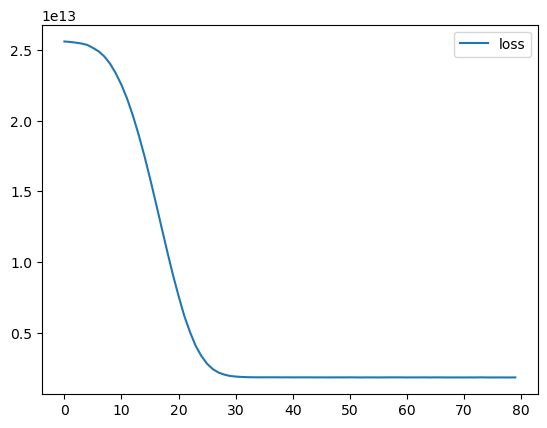

In [54]:
pd.DataFrame(history_7.history).plot()

In [55]:
last_sample = X[-1]
x_input  = last_sample.reshape((1, n_steps, n_features))
yhat = model_7.predict(x_input, verbose=0)
print(yhat)

[[2704679.8 2692066. ]]


### 3.3 Serie temporal multivariada predicción múltiple de cada entrada

In [56]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step_parallel(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [57]:
# Elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 3, 2

X, y = split_multivariate_sequence_m_step_parallel(data_encoded.to_numpy(), n_steps_in, n_steps_out)
X.shape ,y.shape

((541, 3, 14), (541, 2, 14))

In [58]:
# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))
y.shape

(541, 28)

In [59]:
n_features = X.shape[2]

# Definimos nuestro modelo
model_8 = Sequential()
model_8.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_8.add(MaxPooling1D())
model_8.add(Flatten())
model_8.add(Dense(50, activation='relu'))
model_8.add(Dense(n_output))
model_8.compile(optimizer='adam', loss='mse')

In [60]:
history_8 = model_8.fit(X, y, epochs=80, verbose=0)

<Axes: >

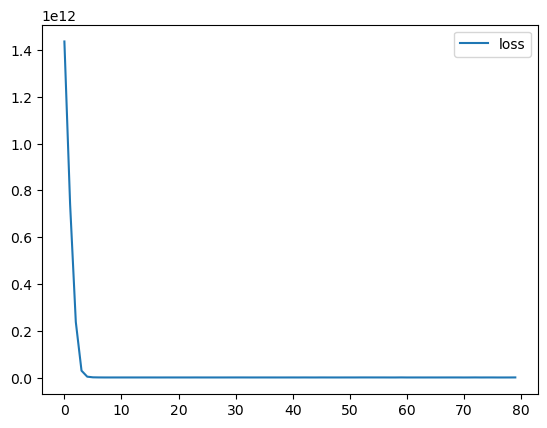

In [61]:
pd.DataFrame(history_8.history).plot()

In [63]:
# Probar nuestro modelo
x_input  = X[-1].reshape((1, n_steps_in, n_features))
yhat  = model_8.predict(x_input, verbose=0)
print(yhat)

[[ 1.8499482e+03 -8.6182880e+02  9.0407727e+02  6.3950427e+02
   1.1428563e+03 -1.5534321e+03  6.2088252e+03 -5.0174717e+03
  -9.8031714e+02 -4.8304678e+02  3.9532625e+03  1.1040768e+03
   9.1675964e+02  1.7778858e+06  5.2699209e+03 -6.1010602e+02
  -2.8795732e+03 -4.4827197e+02  4.4089929e+02  9.8969307e+01
  -3.1315098e+03  2.1676715e+02 -1.7873152e+03 -4.0651738e+03
   2.7449944e+03  1.5973698e+03  1.0503629e+03  1.7755729e+06]]


In [64]:
[yhat[i].reshape(n_steps_out, n_features) for i in range(yhat.shape[0])]

[array([[ 1.8499482e+03, -8.6182880e+02,  9.0407727e+02,  6.3950427e+02,
          1.1428563e+03, -1.5534321e+03,  6.2088252e+03, -5.0174717e+03,
         -9.8031714e+02, -4.8304678e+02,  3.9532625e+03,  1.1040768e+03,
          9.1675964e+02,  1.7778858e+06],
        [ 5.2699209e+03, -6.1010602e+02, -2.8795732e+03, -4.4827197e+02,
          4.4089929e+02,  9.8969307e+01, -3.1315098e+03,  2.1676715e+02,
         -1.7873152e+03, -4.0651738e+03,  2.7449944e+03,  1.5973698e+03,
          1.0503629e+03,  1.7755729e+06]], dtype=float32)]